<a href="https://colab.research.google.com/github/VishalDalwadi/027_VishalDalwadi/blob/main/Lab5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_boston   #for loading the toy datasets to check our code
import matplotlib.pyplot as plt            #For ploting the graph for the better understanding of linear regression

In [2]:
#load_boston() returns the regression dataset
dataset = load_boston()
#dataset.data gives the features
X = dataset.data
#dataset.target gives the target values which we also called as the label for the dataset
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 506


In [3]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)


In [4]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)


In [5]:
n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

In [6]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost is:  [11.00713381]


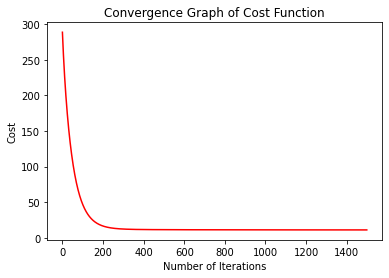

In [7]:
plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()